In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('all_seasons.csv', index_col=[0])

In [3]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12305 entries, 0 to 12304
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12305 non-null  object 
 1   team_abbreviation  12305 non-null  object 
 2   age                12305 non-null  float64
 3   player_height      12305 non-null  float64
 4   player_weight      12305 non-null  float64
 5   college            12305 non-null  object 
 6   country            12305 non-null  object 
 7   draft_year         12305 non-null  object 
 8   draft_round        12305 non-null  object 
 9   draft_number       12305 non-null  object 
 10  gp                 12305 non-null  int64  
 11  pts                12305 non-null  float64
 12  reb                12305 non-null  float64
 13  ast                12305 non-null  float64
 14  net_rating         12305 non-null  float64
 15  oreb_pct           12305 non-null  float64
 16  dreb_pct           123

Существуют ли пропуски

In [5]:
df.isna().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

In [6]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000,12305.000000
mean,27.084518,200.611602,100.369926,51.290532,8.172775,3.559155,1.813986,-2.255733,0.054473,0.141014,0.184891,0.511060,0.131358
std,4.335868,9.146321,12.477150,25.095909,5.974957,2.483550,1.794155,12.673254,0.043599,0.062704,0.053390,0.101163,0.094483
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.480000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.131000,0.181000,0.524000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.217000,0.561000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Можно заметить некоторые особенности:
1. Для игрока свойственно, что в среднем своя команда набирает меньше очков, чем команда противника. (Это можно заметить по отрицательному net_rating)
2. Чтобы игроку быть лучше половины всех игроков, игравших в НБА, нужно в среднем набирать 7 очков за игру (>6.7)
3. В НБА играют не только мужчины ростом 2 метра, ведь у четверти всех игроков рост был меньше 193

Можно посмотреть как изменилось набираемое количество очков с первого сезона и до последнего

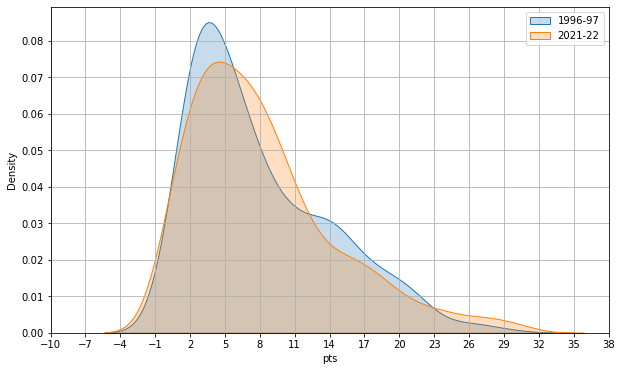

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

ax1 = sns.kdeplot(data=df[df['season'] == df['season'][0]], x='pts', label='1996-97', fill=True)
ax2 = sns.kdeplot(data=df[df['season'] == df['season'][12304]], x='pts', label='2021-22', fill=True)

ax = plt.legend()
ax = plt.grid()
ax = plt.xticks(np.arange(-10, 40, 3))

Из графика видно, что количество игроков, набирающих примерно от 6 до 12 очков увеличилось, отсюда можно сделать вывод, что игроки со временем стали набирать большие очки, что также видно по моде. Также увеличилось количество игроков, набирающих высокие очки (>25)

Можно провести анализ стран игроков

In [8]:
no_dubls = df.drop_duplicates(subset=['player_name'])

In [9]:
no_dubls

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12285,McKinley Wright IV,MIN,23.0,180.34,87.089664,Colorado,USA,Undrafted,Undrafted,Undrafted,...,1.0,0.0,0.6,-25.8,0.000,0.000,0.082,0.833,0.231,2021-22
12291,Matt Ryan,BOS,25.0,200.66,97.522280,Tennessee-Chattanooga,USA,Undrafted,Undrafted,Undrafted,...,3.0,0.0,0.0,25.0,0.000,0.000,0.357,0.300,0.000,2021-22
12299,Marko Simonovic,CHI,22.0,210.82,99.790240,None,Montenegro,2020,2,44,...,1.9,1.1,0.0,1.2,0.122,0.119,0.247,0.428,0.000,2021-22
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,Undrafted,Undrafted,Undrafted,...,1.1,1.9,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-22


In [10]:
no_dubls['country'].value_counts()

USA                         2067
Canada                        39
France                        35
Australia                     19
Croatia                       15
                            ... 
U.S. Virgin Islands            1
Belize                         1
St. Vincent & Grenadines       1
US Virgin Islands              1
Portugal                       1
Name: country, Length: 80, dtype: int64

Можно заметить сильное преимущество США над другими странами в плане того, откуда игрок  
В процентах:

In [11]:
usa_prcnt = sum(no_dubls['country']=='USA')/no_dubls.shape[0]*100
no_usa_prcnt = sum(no_dubls['country']!='USA')/no_dubls.shape[0]*100
print(round(usa_prcnt, 2), round(no_usa_prcnt, 2))

83.92 16.08


([<matplotlib.patches.Wedge at 0x1f3567a39d0>,
 [Text(-0.962636571392363, 0.5322882972769137, 'USA'),
  Text(0.962636471719492, -0.5322884775339852, 'No USA')],
 [Text(-0.5250744934867434, 0.2903390712419529, '83.92%'),
  Text(0.5250744391197228, -0.2903391695639919, '16.08%')])

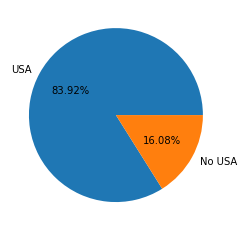

In [12]:
usa_no_usa=[usa_prcnt, no_usa_prcnt]
labels=['USA', 'No USA']


fig, ax = plt.subplots()

ax.pie(usa_no_usa, labels=labels, autopct='%.2f%%')

Следя за баскетболом сейчас, я осмелюсь выдвинуть предположение о том, что в лиге стало больше игроков не из США.

In [13]:
then_usa_prcnt = sum((df['season']=='1996-97') & (df['country']=='USA'))/sum(df['season']=='1996-97')*100
then_no_usa_prcnt = sum((df['season']=='1996-97') & (df['country']!='USA'))/sum(df['season']=='1996-97')*100
now_usa_prcnt = sum((df['season']=='2021-22') & (df['country']=='USA'))/sum(df['season']=='2021-22')*100
now_no_usa_prcnt = sum((df['season']=='2021-22') & (df['country']!='USA'))/sum(df['season']=='2021-22')*100

print('Процент игроков из США раньше: {}'
      '\nпроцент игроков не из США сейчас: {}'
      '\n\nПроцент игроков из США сейчас: {}'
      '\nпроцент игроков не из США сейчас: {}'
      .format(round(then_usa_prcnt,2),
              round(then_no_usa_prcnt,2),
              round(now_usa_prcnt,2),
              round(now_no_usa_prcnt, 2))
     )

Процент игроков из США раньше: 97.96
процент игроков не из США сейчас: 2.04

Процент игроков из США сейчас: 78.02
процент игроков не из США сейчас: 21.98


Наглядно на графике:

In [14]:
def usa_nousa(country):
    if country=='USA':
        return 'USA'
    else:
        return 'No USA'

In [15]:
df_t = df

In [16]:
df_t['usa_no_usa'] = df_t['country'].apply(usa_nousa)

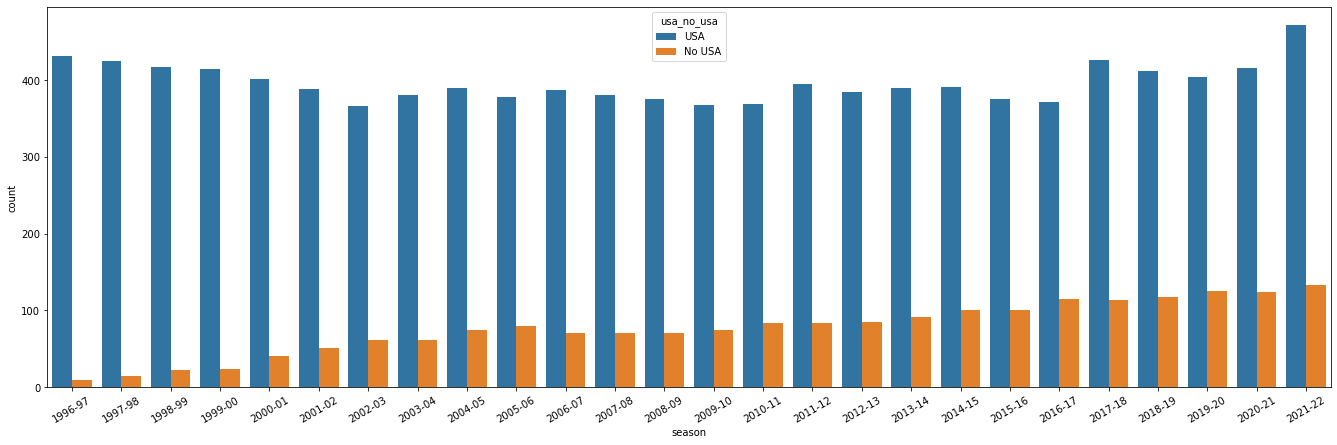

In [17]:
fig, ax = plt.subplots(figsize=(23,7))

ax = sns.countplot(data=df_t, x='season', hue='usa_no_usa')
ax = plt.xticks(rotation=30)

Рост игрока в НБА считается одним из самых главных показателей. Можно посмотреть как менялся средний рост игроков на протяжении сезонов

In [18]:
season_height = df.groupby('season')['player_height'].mean().reset_index()
season_height.head()

,season,player_height
0,1996-97,200.994830
1,1997-98,200.619499
2,1998-99,200.903007
3,1999-00,200.920959
4,2000-01,200.752154


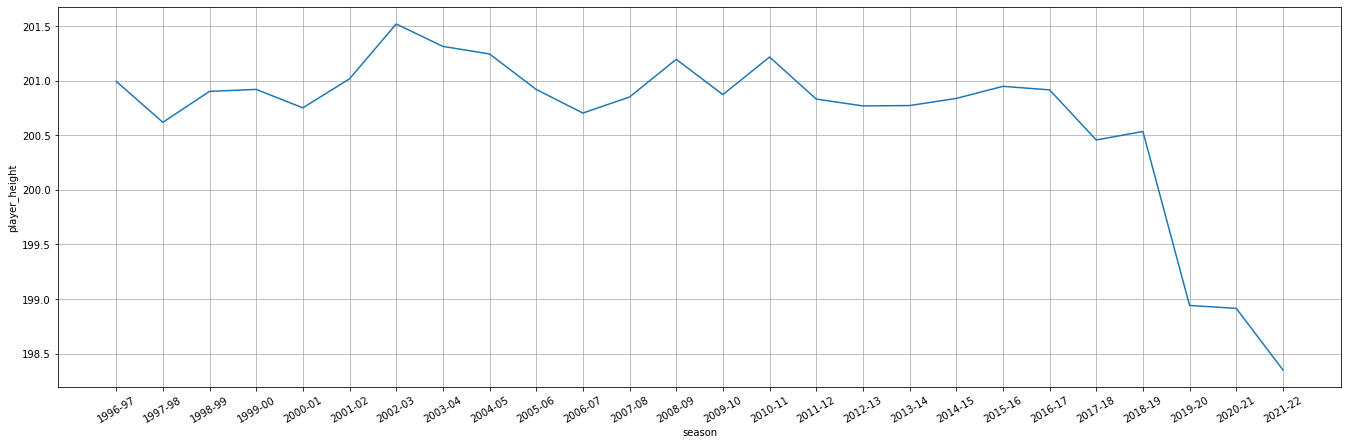

In [19]:
fig, ax = plt.subplots(figsize=(23,7))

ax = sns.lineplot(data=season_height, x='season', y='player_height')
ax = plt.xticks(rotation=30)
ax = plt.grid()

Можно заметить нисходящий тренд после сезона 2018-19, где средний показатель роста был 200,5. Стоит проверить с чем связано такое падение среднего роста, т.к. оно может быть связано как с тем, что уменьшилось количество игроков превышающих средний рост, так и с тем, что увеличилось количество игроков не превышающих средний рост, или вообще случилось все сразу

In [20]:
p_m_18 = sum(df[df['season']=='2018-19']['player_height']>200.5)/df[df['season']=='2018-19'].shape[0]*100
p_l_18 = sum(df[df['season']=='2018-19']['player_height']<200.5)/df[df['season']=='2018-19'].shape[0]*100
p_m_19 = sum(df[df['season']=='2019-20']['player_height']>200.5)/df[df['season']=='2019-20'].shape[0]*100
p_l_19 = sum(df[df['season']=='2019-20']['player_height']<200.5)/df[df['season']=='2019-20'].shape[0]*100

print('Процент игроков выше 200.5 в сезоне 2018-19: {}'
      '\nпроцент игроков ниже 200.5 в сезоне 2018-19: {}'
      '\n\nПроцент игроков выше 200.5 в сезоне 2019-20: {}'
      '\nпроцент игроков ниже 200.5 в сезоне 2019-20: {}'
      .format(round(p_m_18,2),
              round(p_l_18,2),
              round(p_m_19,2),
              round(p_l_19, 2))
     )

Процент игроков выше 200.5 в сезоне 2018-19: 55.85
процент игроков ниже 200.5 в сезоне 2018-19: 44.15

Процент игроков выше 200.5 в сезоне 2019-20: 48.02
процент игроков ниже 200.5 в сезоне 2019-20: 51.98


Отсюда вывод, что сыграло одновременно два фактора в примерно одинаковой степени: уменьшилось количество игроков выше показателя предыдущего сезона (2018-19) и увеличилось количество игроков ниже показателя предыдущего сезона (2018-19)

В датасете есть отдельные показатели для игрока, но нет какого-то общего, который в целом отражал бы его результативность. Исправлю это созданием новой переменной, считая, что очки, передачи и подборы вносят одинаковый вклад в результативность игрока

In [21]:
df_t['p_a_r'] = df_t['pts']+df_t['ast']+df_t['reb']

In [22]:
df_t.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,usa_no_usa,p_a_r
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,USA,24.9
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,USA,4.1
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,USA,2.2
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,USA,6.6
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,USA,5.0


Можно подчеркнуть, что игроки играли разное количество сезонов, поэтому не совсем корректно брать всех игроков. Выберу только тех игроков, которые сыграли больше сезонов, чем в среднем сыграно игроками

In [23]:
(df_t['player_name'].value_counts()).mean()

4.995939910678035

In [24]:
df_t_5s = df_t.loc[df_t.groupby('player_name')['age'].transform('count')>(df_t['player_name'].value_counts()).mean()]

Средний показатель результативности может зависеть также и от количества игроков в сезоне. Проверю играло ли в каждом сезоне одно и то же количество игроков

In [25]:
df_t_5s['season'].value_counts()

2010-11    396
2014-15    396
2012-13    396
2011-12    396
2017-18    393
2016-17    392
2013-14    392
2015-16    389
2009-10    386
2005-06    383
2007-08    383
2004-05    382
2008-09    378
2006-07    378
2003-04    376
2001-02    376
2000-01    371
2018-19    358
2002-03    357
1999-00    337
1998-99    308
2019-20    308
2020-21    279
1997-98    272
2021-22    254
1996-97    243
Name: season, dtype: int64

Можно заметить, что в сезонах играло разное количество игроков. Проверю выбросы по количеству игроков в сезоне

буду считать выбросами значения больше двух стандартных отклонений

In [26]:
bottom = df_t_5s['season'].value_counts().mean()-2*df_t_5s['season'].value_counts().std()
top = df_t_5s['season'].value_counts().mean()+2*df_t_5s['season'].value_counts().std()
print(bottom, top)

260.89407097848846 452.87515979074226


In [27]:
df_t_5s['season'].value_counts().std()

47.995272203063436

можно также сделать по другому, но в таком случае отсекается слишком много сезонов:

In [28]:
q1 = np.percentile(df_t_5s['season'].value_counts(), 25)
q3 = np.percentile(df_t_5s['season'].value_counts(), 75)
iqr = q3 - q1
print(q1, iqr, q3)

342.0 49.25 391.25


сколько сезонов, где количество игроков считается отклонением

In [29]:
sum(df_t_5s['season'].value_counts()>top)

0

In [30]:
sum(df_t_5s['season'].value_counts()<bottom)

2

конкретно какие это сезоны

In [31]:
df_t_5s.loc[df_t_5s.groupby('season')['player_name'].transform('count')<bottom]['season'].unique()

array(['1996-97', '2021-22'], dtype=object)

сделаю датафрейм без выбросов

In [32]:
df_t_5s_norm = df_t_5s[(df_t_5s['season']!='1996-97') & (df_t_5s['season']!='2021-22')]

Теперь сам график результативности

In [33]:
df_t_5s_norm_par = df_t_5s_norm.groupby('season', as_index=False)['p_a_r'].mean()

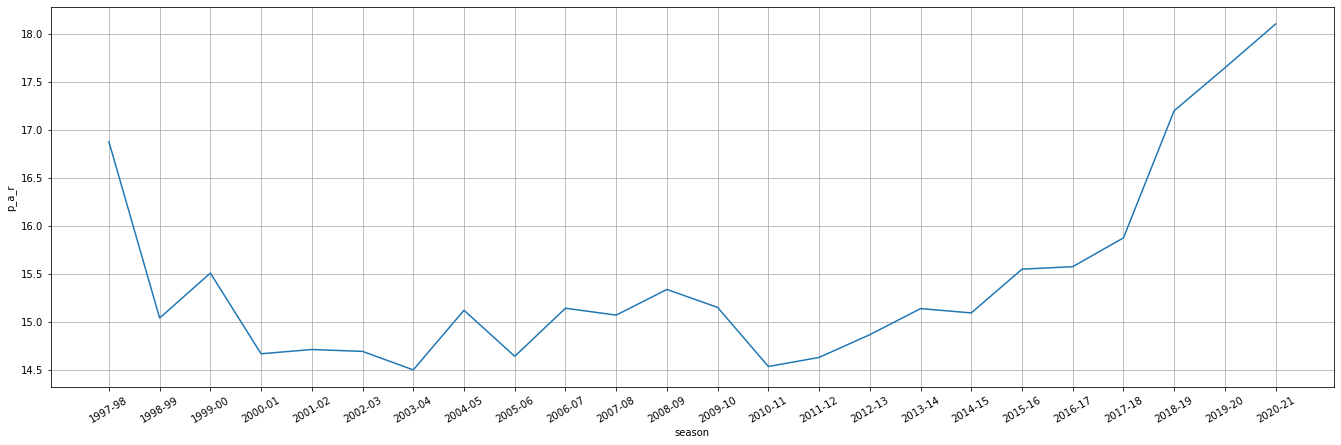

In [34]:
fig, ax = plt.subplots(figsize=(23,7))

ax = sns.lineplot(data=df_t_5s_norm_par, x='season', y='p_a_r')
ax = plt.xticks(rotation=30)
ax = plt.grid()

После сезона 2017-18 виден резкий восходящий тренд. Это может быть либо из-за нескольких игроков, которые показали выдающиеся результаты или же в целом игроки стали результативнее. Проверю это

In [35]:
p_a_r_mean_17_18 = df_t_5s_norm[df_t_5s_norm['season']=='2017-18'][['season', 'player_name', 'p_a_r']]
p_a_r_mean_18_19 = df_t_5s_norm[df_t_5s_norm['season']=='2018-19'][['season', 'player_name', 'p_a_r']]

In [36]:
s_17_18_19 = pd.concat([p_a_r_mean_17_18, p_a_r_mean_18_19])

In [37]:
s_17_18_19

,season,player_name,p_a_r
9561,2017-18,Nikola Jokic,35.3
9563,2017-18,Dwyane Wade,18.6
9564,2017-18,Dwight Powell,15.3
9565,2017-18,Dwight Howard,30.4
9568,2017-18,Draymond Green,25.9
...,...,...,...
10619,2018-19,Jordan Bell,7.1
10620,2018-19,Jordan Clarkson,22.5
10624,2018-19,Jose Calderon,5.8
10625,2018-19,Josh Hart,12.9


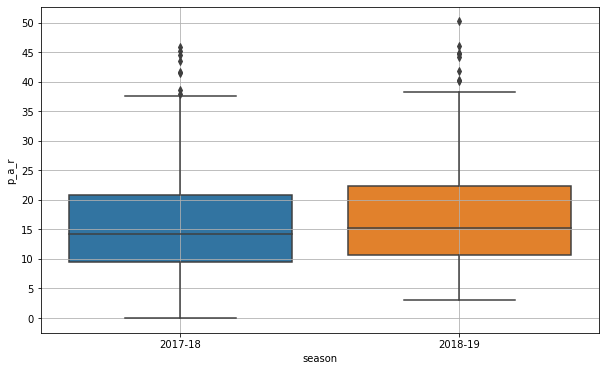

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.boxplot(data=s_17_18_19, x='season', y='p_a_r')
ax = plt.yticks(np.arange(0,55,5))
ax = plt.grid()

Из графика видно, что увеличился в среднем показатель результативности, плюс к этому еще даже сильнее уменьшилось количество игроков с очень низким показателем результативности

Можно также проверить игроков, которые показывали "аномальные" показатели результативности

In [39]:
q1_17_18 = np.percentile(p_a_r_mean_17_18['p_a_r'], 25)
q3_17_18 = np.percentile(p_a_r_mean_17_18['p_a_r'], 75)
iqr_17_18 = q3_17_18 - q1_17_18
print(q1_17_18, iqr_17_18, q3_17_18)

iqr_threshold_buttom_17_18 = q1_17_18 - 1.5*iqr_17_18
iqr_threshold_top_17_18 = q3_17_18 + 1.5*iqr_17_18
print(iqr_threshold_buttom_17_18, iqr_threshold_top_17_18)

9.5 11.3 20.8
-7.450000000000003 37.75


In [40]:
q1_18_19 = np.percentile(p_a_r_mean_18_19['p_a_r'], 25)
q3_18_19 = np.percentile(p_a_r_mean_18_19['p_a_r'], 75)
iqr_18_19 = q3_18_19 - q1_18_19
print(q1_18_19, iqr_18_19, q3_18_19)

iqr_threshold_buttom_18_19 = q1_18_19 - 1.5*iqr_18_19
iqr_threshold_top_18_19 = q3_18_19 + 1.5*iqr_18_19
print(iqr_threshold_buttom_18_19, iqr_threshold_top_18_19)

10.6 11.775 22.375
-7.062500000000002 40.0375


средний показатель результативности для 'аномальных' игроков в сезоне 2017-18:

In [41]:
p_a_r_mean_17_18[p_a_r_mean_17_18['p_a_r']>iqr_threshold_top_17_18]['p_a_r'].mean()

42.362500000000004

средний показатель результативности для 'аномальных' игроков в сезоне 2018-19:

In [42]:
p_a_r_mean_18_19[p_a_r_mean_18_19['p_a_r']>iqr_threshold_top_18_19]['p_a_r'].mean()

44.0375

Отсюда видно, что даже игроки, показывающие "слишком высокую" результативность увеличили этот показатель в 2018-19 сезоне

Можно проверить как раз зависят ли показатели результативности от роста

In [43]:
means = df_t_5s.groupby('player_name', as_index=False) \
               .agg({'player_height':'mean', 'pts':'mean', 'reb':'mean', 'ast':'mean'})

In [44]:
means_corr = means.corr()
matrix = np.triu(means_corr)

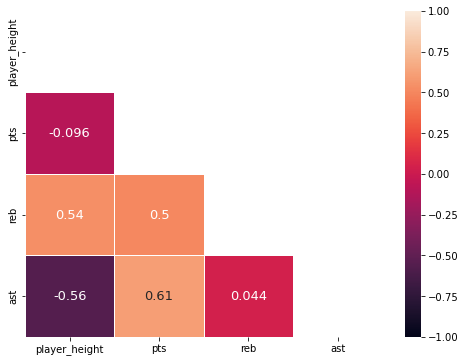

In [45]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.heatmap(means_corr,
                annot=True,
                linecolor='white',
                linewidth=0.5,
                annot_kws={'size':13},
                vmin=-1, vmax=1,
                mask=matrix)

Можно заметить, что чем больше рост игрока, тем меньше он набирает очков, и еще в более сильной степени меньше отдает передач, но больше получает подборов, переменная коррелирует с ростом в средней степени

Отсюда можно вспомнить, что в баскетболе существуют позиции. Как правило, игроки с более высоким ростом занимают позиции центрового, игроки более низкого роста - защитника, остальные - нападающие. Присвою каждому игроку позицию в зависимости от среднего показателя роста для игроков определенной позиции (данные взяты отсюда - https://awesomehoops.com/average-nba-height/)

In [46]:
df_t_5s['position'] = df_t_5s['player_height'].apply(lambda x: 'Center' if x >= 210.82 else 'Guard' if x <= 198.12 else 'Forward')

C:\Users\ilyap\AppData\Local\Temp\ipykernel_17920\2672476503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_5s['position'] = df_t_5s['player_height'].apply(lambda x: 'Center' if x >= 210.82 else 'Guard' if x <= 198.12 else 'Forward')


Как менялись показатели результативности во времени

Text(0.5, 0.98, 'Perfomance per position for all seasons')

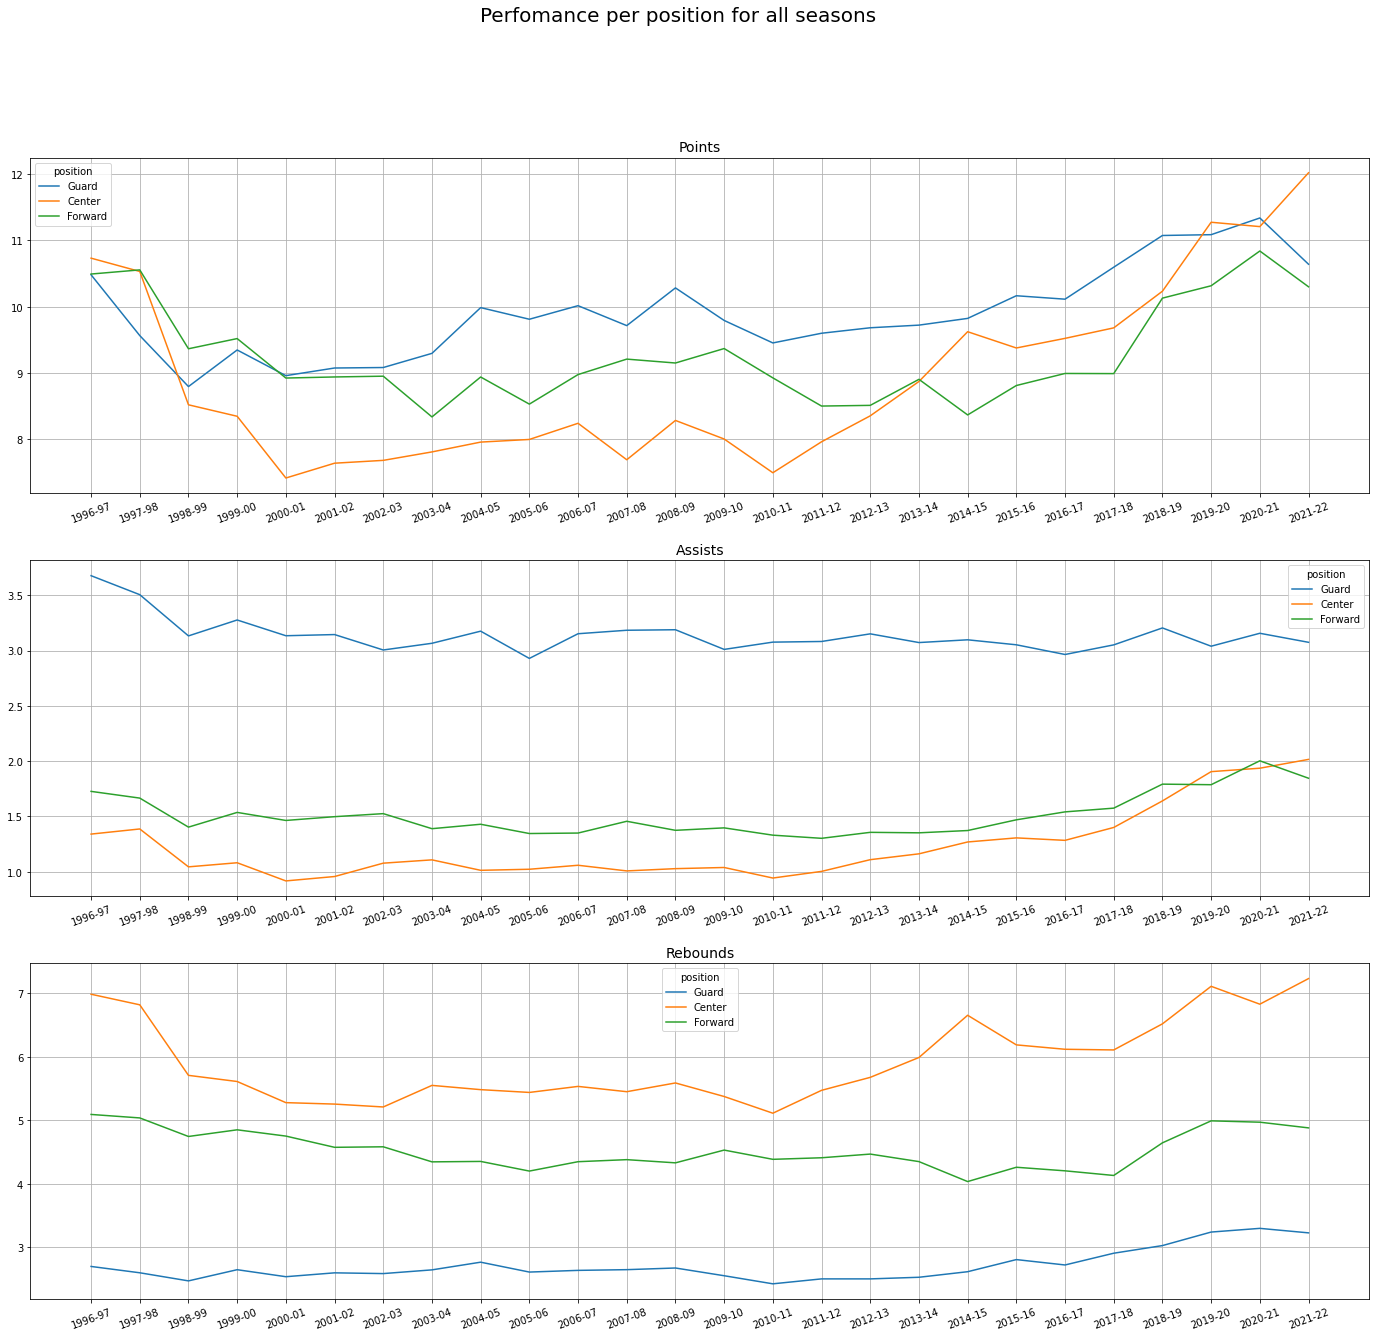

In [47]:
fig, ax = plt.subplots(3,1,figsize=(24,21))

sns.lineplot(data=df_t_5s, x='season', y='pts', hue='position', ci=None, ax=ax[0]).set_title('Points', fontsize=14)
sns.lineplot(data=df_t_5s, x='season', y='ast', hue='position', ci=None, ax=ax[1]).set_title('Assists', fontsize=14)
sns.lineplot(data=df_t_5s, x='season', y='reb', hue='position', ci=None, ax=ax[2]).set_title('Rebounds', fontsize=14)

for axis in ax.ravel():
    axis.grid()
    axis.tick_params(axis='x', labelrotation=20)
    axis.set_xlabel('')
    axis.set_ylabel('')

fig.suptitle('Perfomance per position for all seasons', fontsize=20)

Используя однофакторный дисперсионный анализ можно посмотреть действительно ли команда Golden State Warriors (GSW) была значительно лучше остальных в сезоне 2015-16, ведь тогда был ею установлен рекорд по количеству побед в регулярном сезоне

Нулевая гипотеза: различий средних между групп нет  
уровень значимости а(альфа) = 0.05

In [48]:
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [49]:
s15_16 = df_t_5s[df_t_5s['season']=='2015-16'][['team_abbreviation', 'player_name', 'p_a_r']]

In [50]:
grouped_15_16 = s15_16.groupby('team_abbreviation', as_index=False)['p_a_r'].mean()

In [51]:
grouped_15_16[(grouped_15_16['p_a_r']==grouped_15_16['p_a_r'].max()) | (grouped_15_16['p_a_r']==grouped_15_16['p_a_r'].min())]

,team_abbreviation,p_a_r
16,MIL,17.218182
26,SAS,13.181250


Отсюда уже можно сделать небольшой вывод: GSW по среднему показателю результативности игроков не была лучшей, ей является Milwaukee Bucks (MIL), а самой худшей по показателю результативности была San Antonio Spurs (SAS)

In [52]:
s15_16['team_abbreviation'].nunique()

30

Посмотреть одну команду, показатель результативности игроков которой находился по середине в данных нельзя, т.к. количество команд четное, поэтому я возьму команды, составляющие сумму p_a_r при вычислении медианы, тоесть у которых p_a_r стоит на 15 и 16 местах в отсортированном датасете по столбцу p_a_r

In [53]:
grouped_15_16.sort_values('p_a_r')

,team_abbreviation,p_a_r
26,SAS,13.181250
19,NYK,14.415385
27,TOR,14.492857
24,POR,14.661538
6,DAL,14.721429
8,DET,14.769231
17,MIN,14.875000
14,MEM,14.884615
29,WAS,14.937500
0,ATL,15.023077


In [54]:
grouped_15_16['p_a_r'].median()

15.579166666666666

In [55]:
grouped_15_16[(grouped_15_16['team_abbreviation']=='PHI') | (grouped_15_16['team_abbreviation']=='OKC')]

,team_abbreviation,p_a_r
20,OKC,15.600000
22,PHI,15.558333


In [56]:
grouped_15_16[(grouped_15_16['team_abbreviation']=='PHI') | (grouped_15_16['team_abbreviation']=='OKC')]['p_a_r'].mean()

15.579166666666666

Значения сходятся, значит команды выбраны верно

За команду в качестве срединной я возьму Philadelphia 76ers (PHI)

In [90]:
teams = ['SAS', 'PHI', 'MIL']
som_teams = s15_16.loc[s15_16.isin({'team_abbreviation': teams})['team_abbreviation']]

In [91]:
som_teams['team_abbreviation'].value_counts()

SAS    16
PHI    12
MIL    11
Name: team_abbreviation, dtype: int64

In [59]:
model_anova = ols('p_a_r ~ team_abbreviation', data=som_teams).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
team_abbreviation,110.687531,2.0,0.970239,0.388682
Residual,2053.489905,36.0,NaN,NaN


Судя по one-way anova полученное p-value значение выше уровня значимости, следовательно нулевая гипотеза не отвергается, что говорит о том, что худшая, срединная и лучшая команды в сезоне 2015-16 не отличаются судя по показателю результативности игроков

Но все равно нужно проверить предпосылки для anova, ведь может оказаться на реальных задачах, что зря были потрачены ресурсы и время на проведение anova

проверка на нормальность (0 гипотеза - данные взяты из нормального распределения):

In [60]:
scipy.stats.shapiro(model_anova.resid)

ShapiroResult(statistic=0.9825486540794373, pvalue=0.794221818447113)

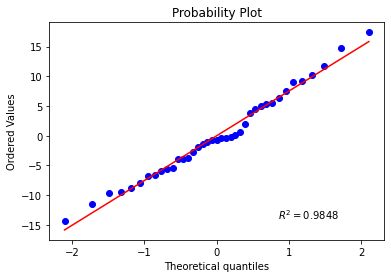

In [61]:
fig, ax = plt.subplots()

ax = scipy.stats.probplot(model_anova.resid, plot=plt, rvalue=True)

судя по графику qqplot и тесту Шапиро, данные распределены нормально

проверка на гомогенность дисперсии (т.к. данные распределены нормально нужно использовать критерий бартлетта (0 гипотеза: дисперсии равны)):

In [62]:
som_teams_unmelted = som_teams.pivot(columns='team_abbreviation', values='p_a_r')

In [63]:
som_teams_unmelted.head()

team_abbreviation,MIL,PHI,SAS
8603,21.8,NaN,NaN
8609,NaN,NaN,3.7
8620,NaN,NaN,15.2
8635,NaN,12.9,NaN
8640,NaN,21.0,NaN


In [64]:
scipy.stats.bartlett(som_teams_unmelted['MIL'].dropna(), som_teams_unmelted['PHI'].dropna(), som_teams_unmelted['SAS'].dropna())

BartlettResult(statistic=1.1366055154164398, pvalue=0.5664860873873594)

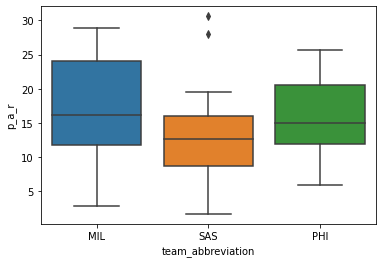

In [65]:
fig, ax = plt.subplots()

ax = sns.boxplot(data=som_teams, x='team_abbreviation', y='p_a_r')

boxplot и тест Бартлетта говорят о равенстве дисперсий в группах

Можно найти 10 игроков, сыгравших больше 5 сезонов, которые в среднем набирали больше всего очков

In [66]:
top_10_pts = df_t_5s.groupby('player_name', as_index=False)['pts'].mean().sort_values(by='pts',ascending=False)[:10]

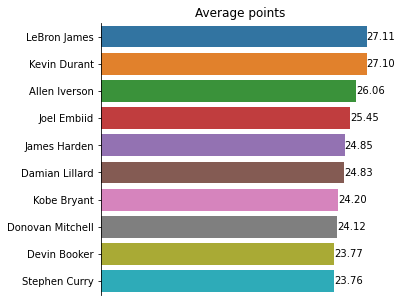

In [67]:
fig, ax = plt.subplots(figsize=(5,5))

ax = sns.barplot(data=top_10_pts, x='pts', y='player_name')
ax = plt.bar_label(ax.containers[0], fmt='%.2f')

ax = sns.despine(bottom=True)
ax = plt.title('Average points')
ax = plt.xlabel('')
ax = plt.ylabel('')
ax = plt.xticks([])

In [68]:
top_10_pts['player_name'].tolist()

['LeBron James',
 'Kevin Durant',
 'Allen Iverson',
 'Joel Embiid',
 'James Harden',
 'Damian Lillard',
 'Kobe Bryant',
 'Donovan Mitchell',
 'Devin Booker',
 'Stephen Curry']

Можно посмотреть как от сезона к сезону менялись показатели очков у этих 10 игроков

In [69]:
full_top_10_pts = df_t_5s.loc[df_t_5s.isin({'player_name': top_10_pts['player_name'].tolist()})['player_name']]

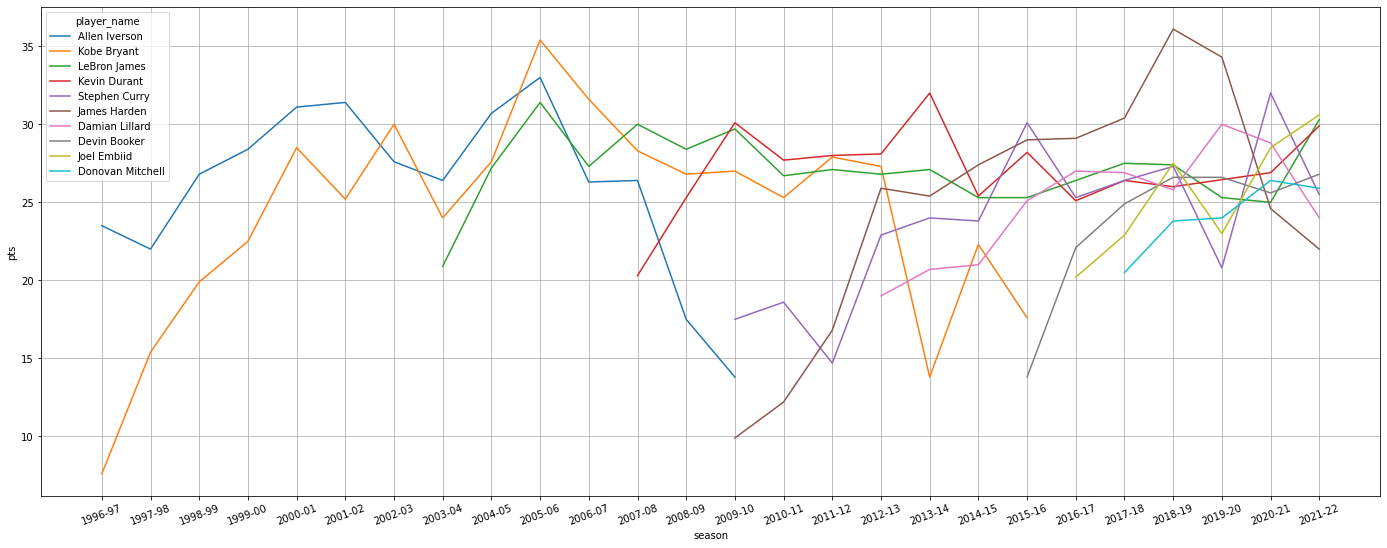

In [70]:
fig, ax = plt.subplots(figsize=(24, 9))

ax = sns.lineplot(data=full_top_10_pts, x='season', y='pts', hue='player_name')
ax = plt.grid()
ax = plt.xticks(rotation=20)

Используя кластерный анализ, можно посмотреть оправдал ли ожидания игрок. Это можно сделать используя показатель результативности и номер, под которым выбрали игрока. Нужно три кластера: оправдал ожидания, превысил ожидания и соответствует ожиданиям. Те игроки, у кого стоит Undrafted, будут убраны. Чтобы объективнее оценить ожидания будет выбран датафрейм с игроками, сыгравшими больше 5 сезонов

In [71]:
df_t_5s['draft_number'] = df_t_5s['draft_number'].apply(lambda x: np.nan if x=='Undrafted' else x)

C:\Users\ilyap\AppData\Local\Temp\ipykernel_17920\1430388248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_5s['draft_number'] = df_t_5s['draft_number'].apply(lambda x: np.nan if x=='Undrafted' else x)


In [72]:
df_t_5s.dropna(inplace=True)

C:\Users\ilyap\AppData\Local\Temp\ipykernel_17920\1571321959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_5s.dropna(inplace=True)


In [73]:
df_draft_par = df_t_5s.groupby('player_name').agg({'draft_number':'max',
                                                   'p_a_r':'mean'})

In [74]:
df_draft_par['draft_number'] = df_draft_par['draft_number'].astype('int')

In [75]:
df_draft_par.sort_values('draft_number', inplace=True)

In [76]:
df_draft_par.head()

,draft_number,p_a_r
player_name,,
Markelle Fultz,1,17.980000
Andrea Bargnani,1,20.030000
Andrew Bogut,1,18.828571
Kwame Brown,1,12.358333
Andrew Wiggins,1,26.212500


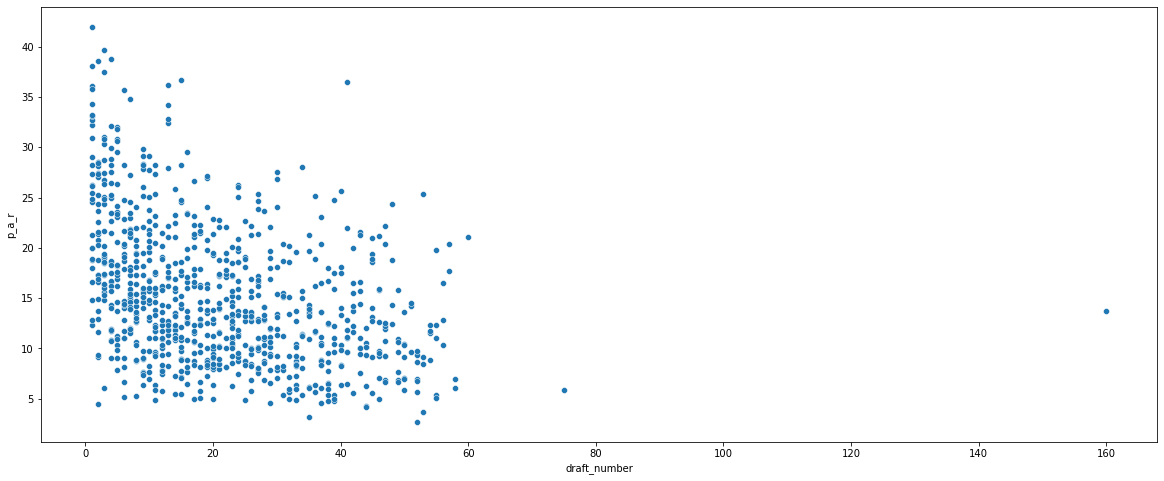

In [77]:
fig, ax = plt.subplots(figsize=(20,8))

ax = sns.scatterplot(data=df_draft_par, x='draft_number', y='p_a_r')

In [78]:
X = df_draft_par

In [79]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, 
              init='k-means++',
              max_iter=10,
              random_state=42).fit(X)

In [80]:
colors=['red', 'green', 'blue']
X_arr = np.array(df_draft_par[['draft_number', 'p_a_r']])

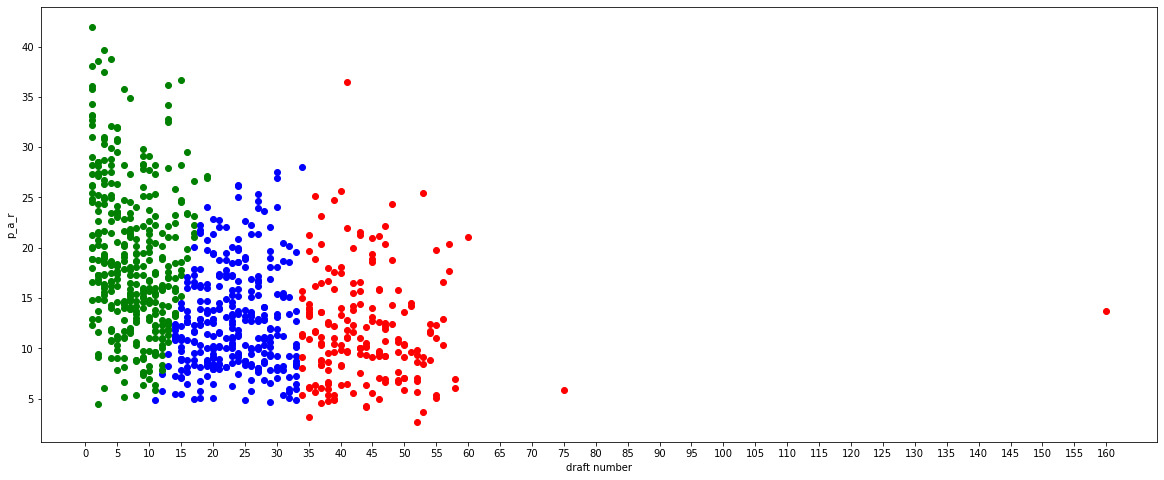

In [81]:
plt.figure(figsize=(20, 8))

for i in range(len(model.labels_)):
    plt.scatter(X_arr[i, 0], X_arr[i, 1], color=colors[model.labels_[i]])
    plt.xlabel('draft number')
    plt.ylabel('p_a_r')
    plt.xticks(np.arange(0,161,5))

Можно заметить, что кластерный анализ kmeans дал не совсем тот результат. Такой результат можно списать на то, что kmeans лучше работает с шарообразными кластерами.

Для лучшей кластеризации можно посмотреть подходящее количество кластеров при помощи метода логтя и используя метрики эффективности кластеризации или использовать метод dbscan, который лучше подходит для кластеров любой формы и хорошо справляется с шумом

Используя метод логтя и коэффициент силуэта:

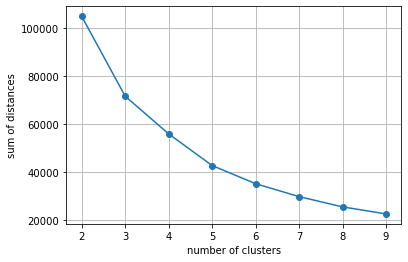

In [82]:
K = range(2, 10)
models = [KMeans(n_clusters=k, init='k-means++', max_iter=10).fit(X) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum of distances')
plt.grid()

In [83]:
from sklearn.metrics import silhouette_score

for num_clust in K:
    kmeans = KMeans(n_clusters=num_clust, init='k-means++', max_iter=10)
    kmeans.fit(X)
    
    clust_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, clust_labels)
    print("For n_clusters={}, the silhouette score is {}".format(num_clust, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5157280108587186
For n_clusters=3, the silhouette score is 0.4230977232676305
For n_clusters=4, the silhouette score is 0.3873753702795207
For n_clusters=5, the silhouette score is 0.398850046825287
For n_clusters=6, the silhouette score is 0.3633838434589197
For n_clusters=7, the silhouette score is 0.36996407630318384
For n_clusters=8, the silhouette score is 0.35613901638705936
For n_clusters=9, the silhouette score is 0.36899315079559103


Смотря на коэффициент силуэта видно, что самая большая разница между значениями этой метрики при числе кластеров 3

Используя dbscan:

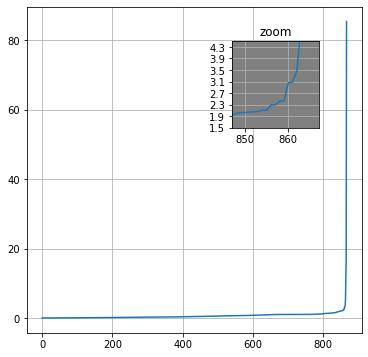

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 11).fit(X)
distances, indices = knn.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]


fig, ax = plt.subplots(figsize=(6,6))

ax = plt.plot(distances)
ax = plt.grid()

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='grey')
ax2.plot(distances)
ax2.set_title('zoom')
ax2.set_xlim([847,867])
ax2.set_ylim([1.5, 4.5])
ax2 = plt.yticks(np.arange(1.5,4.6, 0.4))
ax2 = plt.grid()

Методом подбора было выявлено, что лучше всего взять значение 3.5, хотя из графика видно, что лучше брать значение где-то от 2.3 до 3.1, но беря такие значения в таком диапазоне, получалось не совсем логическое разбиение на кластеры, где определенных игроков, следя за NBA, нельзя отнести к одной группе

In [85]:
from sklearn.cluster import DBSCAN

modeldbscan = DBSCAN(eps=3.5, min_samples=3).fit(X)

In [86]:
np.asarray(np.unique(modeldbscan.labels_, return_counts=True)).T

array([[ -1,   4],
       [  0, 853],
       [  1,   5],
       [  2,   5]], dtype=int64)

In [87]:
df_draft_par['dbscan'] = modeldbscan.labels_
df_draft_par.sort_values('dbscan', inplace=True)

In [88]:
colorsdbscan = ['red', 'green', 'blue', 'black']

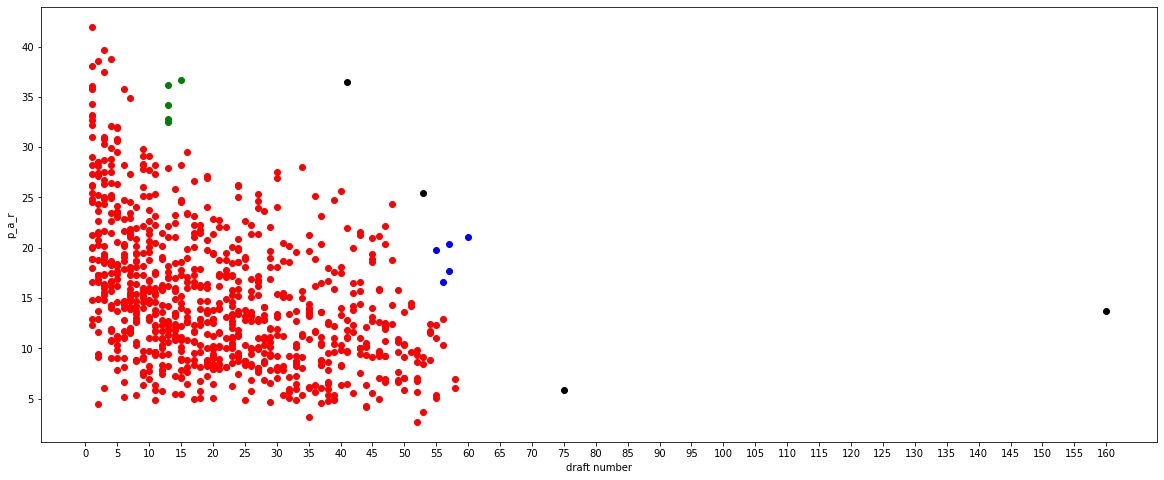

In [89]:
plt.figure(figsize=(20,8))

for i in range(len(modeldbscan.labels_)):    
    plt.scatter(X_arr[i, 0], X_arr[i, 1], color=colorsdbscan[modeldbscan.labels_[i]])
    plt.xlabel('draft number')
    plt.ylabel('p_a_r')
    plt.xticks(np.arange(0,161,5))

Судя по графику, можно сделать следующие выводы:
1. игроки, отмеченные черным цветом, dbscan определил как выбросы, это те игроки, которые сильно превзошли ожидания, хоть и вызывает сомнения игрок с драфт номером 75
2. игроки, отмеченные синим и зеленым, просто превзошли ожидания
3. игроки, отмеченные красным цветом соответствуют ожиданиям, хотя и вызывают сомнения игроки, находящиеся в левом нижнем углу